In [1]:
import pandas as pd
import numpy as np
from prompt_toolkit.input import Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.layers import Dense,Dropout, Conv1D, Flatten, MaxPooling1D, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Input

In [2]:
df = pd.read_csv('datasets/amazon_stock_price.csv')

In [3]:
df

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...,...
6680,2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
6681,2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
6682,2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200
6683,2023-12-05,143.5500,148.5700,143.1300,146.8800,46822400


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index(keys='date', inplace=True)
df.sort_index(inplace=True)

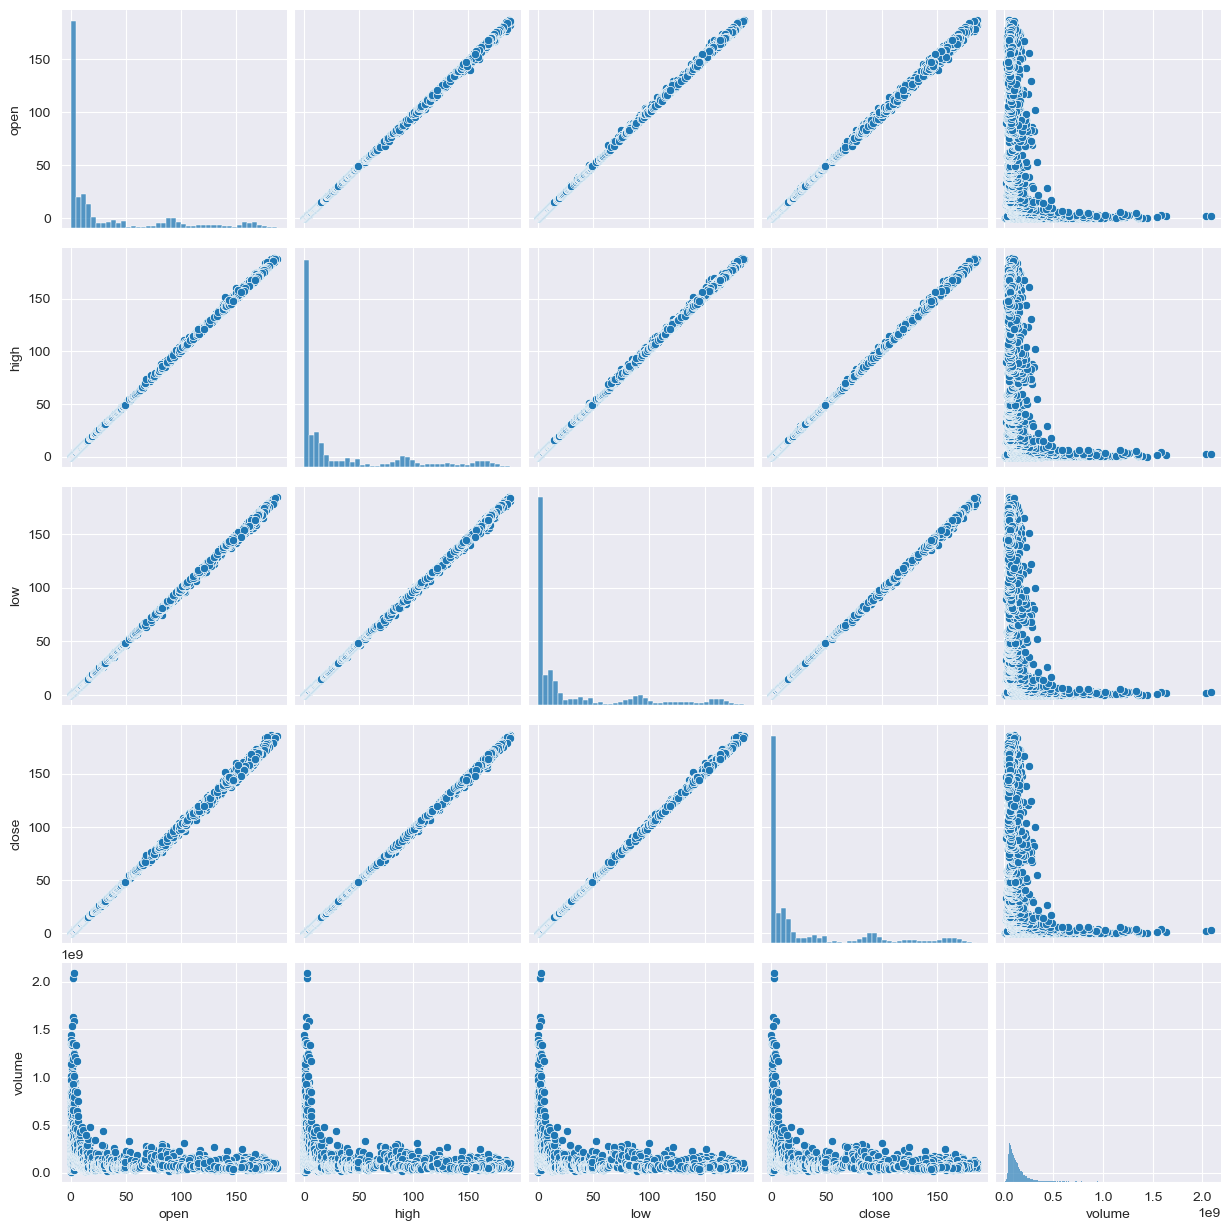

In [5]:
sns.pairplot(df)

<Axes: >

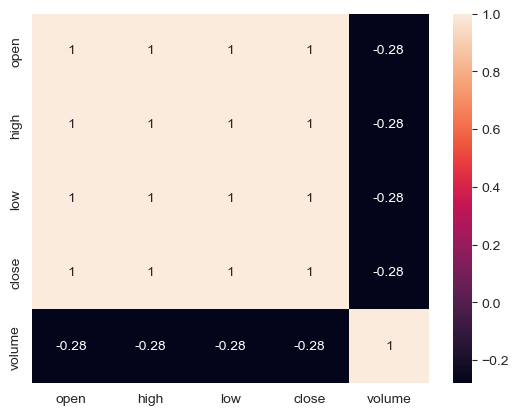

In [6]:
sns.heatmap(df.corr(), annot=True)

In [4]:
features = ['open', 'high', 'low', 'volume']
target = 'close'

In [5]:
# vtor nacin - lag na site 

for lag  in range(7,0,-1):
    for feature in features + [target]:
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)

In [11]:
df

,open,high,low,close,volume,open_lag7,high_lag7,low_lag7,volume_lag7,open_lag6,...,high_lag1,low_lag1,volume_lag1,close_lag7,close_lag6,close_lag5,close_lag4,close_lag3,close_lag2,close_lag1
date,,,,,,,,,,,,,,,,,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000,NaN,NaN,NaN,NaN,NaN,...,0.1250,0.0964,1.443120e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0979
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000,NaN,NaN,NaN,NaN,NaN,...,0.0990,0.0854,2.940000e+08,NaN,NaN,NaN,NaN,NaN,0.0979,0.0865
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000,NaN,NaN,NaN,NaN,NaN,...,0.0885,0.0812,1.221360e+08,NaN,NaN,NaN,NaN,0.0979,0.0865,0.0854
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000,NaN,NaN,NaN,NaN,NaN,...,0.0875,0.0818,1.093440e+08,NaN,NaN,NaN,0.0979,0.0865,0.0854,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000,145.13,146.63,144.73,41951200.0,143.91,...,148.5400,145.9700,4.061090e+07,146.13,143.90,146.71,146.7400,147.7300,147.0300,146.3200
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600,143.91,144.05,141.50,71226000.0,144.57,...,146.9300,144.3300,6.581400e+07,143.90,146.71,146.74,147.7300,147.0300,146.3200,146.0900
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200,144.57,147.74,144.57,45669100.0,146.70,...,147.2500,145.5500,3.992460e+07,146.71,146.74,147.73,147.0300,146.3200,146.0900,147.0300


In [6]:
df.drop(columns=features, inplace=True)

In [7]:
df.dropna(axis=0, inplace=True)

In [14]:
df

,close,open_lag7,high_lag7,low_lag7,volume_lag7,open_lag6,high_lag6,low_lag6,volume_lag6,open_lag5,...,high_lag1,low_lag1,volume_lag1,close_lag7,close_lag6,close_lag5,close_lag4,close_lag3,close_lag2,close_lag1
date,,,,,,,,,,,,,,,,,,,,,
1997-05-27,0.0792,0.1219,0.1250,0.0964,1.443120e+09,0.0984,0.0990,0.0854,294000000.0,0.0880,...,0.0760,0.0667,318744000.0,0.0979,0.0865,0.0854,0.0818,0.0714,0.0698,0.0750
1997-05-28,0.0766,0.0984,0.0990,0.0854,2.940000e+08,0.0880,0.0885,0.0812,122136000.0,0.0865,...,0.0823,0.0729,173952000.0,0.0865,0.0854,0.0818,0.0714,0.0698,0.0750,0.0792
1997-05-29,0.0753,0.0880,0.0885,0.0812,1.221360e+08,0.0865,0.0875,0.0818,109344000.0,0.0818,...,0.0818,0.0766,91488000.0,0.0854,0.0818,0.0714,0.0698,0.0750,0.0792,0.0766
1997-05-30,0.0750,0.0865,0.0875,0.0818,1.093440e+08,0.0818,0.0823,0.0688,377064000.0,0.0719,...,0.0771,0.0740,69456000.0,0.0818,0.0714,0.0698,0.0750,0.0792,0.0766,0.0753
1997-06-02,0.0755,0.0818,0.0823,0.0688,3.770640e+08,0.0719,0.0724,0.0656,235536000.0,0.0703,...,0.0755,0.0740,51888000.0,0.0714,0.0698,0.0750,0.0792,0.0766,0.0753,0.0750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,146.0900,145.1300,146.6300,144.7300,4.195120e+07,143.9100,144.0500,141.5000,71226000.0,144.5700,...,148.5400,145.9700,40610900.0,146.1300,143.9000,146.7100,146.7400,147.7300,147.0300,146.3200
2023-12-01,147.0300,143.9100,144.0500,141.5000,7.122600e+07,144.5700,147.7400,144.5700,45669100.0,146.7000,...,146.9300,144.3300,65814000.0,143.9000,146.7100,146.7400,147.7300,147.0300,146.3200,146.0900
2023-12-04,144.8400,144.5700,147.7400,144.5700,4.566910e+07,146.7000,147.2000,145.3200,22378400.0,147.5300,...,147.2500,145.5500,39924600.0,146.7100,146.7400,147.7300,147.0300,146.3200,146.0900,147.0300


In [31]:
x = df.drop(columns='close')
y = df['close']

In [32]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [33]:
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=False)

In [35]:
x_train.shape[1] // 7

5

In [13]:
x_train.shape

(5342, 35)

In [36]:
lags = 7

In [38]:
# (samples, features, lags) 
x_train_reshaped = x_train.reshape((x_train.shape[0], (x_train.shape[1] // 7), lags))
x_test_reshaped = x_test.reshape((x_test.shape[0], (x_test.shape[1] // 7), lags))

In [39]:
x_train_reshaped.shape

(5342, 5, 7)

In [26]:
help(LSTM)

Help on class LSTM in module keras.layers.rnn.lstm:

class LSTM(keras.layers.rnn.dropout_rnn_cell_mixin.DropoutRNNCellMixin, keras.layers.rnn.base_rnn.RNN, keras.engine.base_layer.BaseRandomLayer)
 |  LSTM(units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, time_major=False, unroll=False, **kwargs)
 |  
 |  Long Short-Term Memory layer - Hochreiter 1997.
 |  
 |  See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
 |  for details about the usage of RNN API.
 |  
 |  Based on available runtime hardware and constraints, this layer
 |  will

In [27]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

# Neural Network

In [50]:
model = Sequential([
    LSTM(50, activation = 'relu', return_sequences=True, input_shape = (x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1, activation='linear')
])

In [51]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mean_squared_error"])

In [52]:
history = model.fit(x_train_reshaped, y_train, validation_split = 0.1, epochs=8, batch_size=16)

Epoch 1/8
301/301 [==============================] - 1s 2ms/step - loss: 1.7460e-04 - mean_squared_error: 1.7460e-04 - val_loss: 1.7421e-04 - val_mean_squared_error: 1.7421e-04
Epoch 2/8
301/301 [==============================] - 1s 2ms/step - loss: 2.0477e-05 - mean_squared_error: 2.0477e-05 - val_loss: 2.2940e-04 - val_mean_squared_error: 2.2940e-04
Epoch 3/8
301/301 [==============================] - 1s 2ms/step - loss: 1.9310e-05 - mean_squared_error: 1.9310e-05 - val_loss: 2.3543e-04 - val_mean_squared_error: 2.3543e-04
Epoch 4/8
301/301 [==============================] - 1s 2ms/step - loss: 1.9772e-05 - mean_squared_error: 1.9772e-05 - val_loss: 4.9311e-04 - val_mean_squared_error: 4.9311e-04
Epoch 5/8
301/301 [==============================] - 1s 2ms/step - loss: 1.8163e-05 - mean_squared_error: 1.8163e-05 - val_loss: 2.4351e-04 - val_mean_squared_error: 2.4351e-04
Epoch 6/8
301/301 [==============================] - 1s 2ms/step - loss: 1.6183e-05 - mean_squared_error: 1.6183e-0

<Axes: >

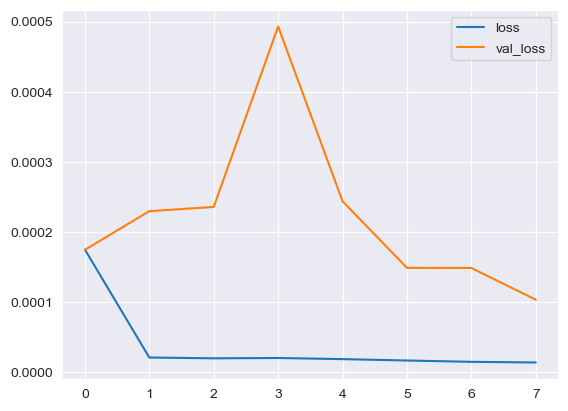

In [53]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [54]:
y_pred = model.predict(x_test_reshaped)

42/42 [==============================] - 0s 681us/step


In [55]:
y_pred = scaler_y.inverse_transform(y_pred)

In [56]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Root Mean Squared Error: 10.773137798615693
Mean Absolute Error: 8.510245894106555
R2 Score: 0.8859262324866817
